# Gradient descent

## Introduction to the data

We have a dataset `pga.csv` containing professional golfers' driving statistics in two columns, `accuracy` and `distance`. Accuracy is measured as the percentage of fairways hit over many drives. Distances is measured as the average drive distance, in yards. Our goal is to predict accuracy using distance. In golf, it's expected that the further someone hits the ball the less accurate they will be. Lets see if this holds up.<br>

For many machine learning algorithms **it's important to scale, or normalize, the data before using it**. Here we have 
* `distance`, measured in yards, 
* `accuracy`, measured in percentages. 

These two fields are **on very different scales** which can **produce bias into learning algorithms**. Many algorithms compute the Eucilidean Distance between two observations and if one of the features is vastly larger than another, the distance will be biased towards that particular feature.
* To normalize the data, for each value, subtract each the mean and then divide by the standard deviation.

After normalizing the data, we plot the data to get a visual sense of the data.


In [1]:
import pandas
import matplotlib.pyplot as plt

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


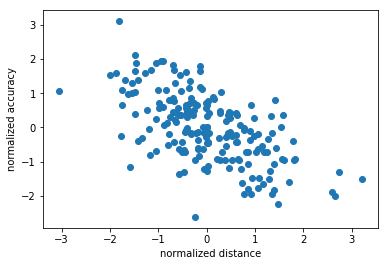

In [2]:
# Read data from csv
pga = pandas.read_csv("data/pga.csv")

# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

## Linear model

From this plot, the data looks linear with a negative slope, lower accuracy with higher distance. We can use a linear model, as shown in previous missions, to model this data. This model is written as 

$$\text{accuracy}_i=\theta_{1}\text{distance}_{i}+\theta_0+\epsilon_i$$

where θ's are coefficients and ϵ are error terms. To start, lets use `sklearn`'s `LinearRegression` class to estimate a linear model.

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# We can add a dimension to an array by using np.newaxis
print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

# The X variable in LinearRegression.fit() must have 2 dimensions
X = pga.distance[:, np.newaxis]
y = pga.accuracy

lr = LinearRegression()
lr.fit(X, y)
theta1 = lr.coef_

Shape of the series: (197,)
Shape with newaxis: (197, 1)


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [4]:
theta1

array([-0.60759882])

## Cost function, introduction

We utilized a pre-existing library `sklearn` to estimate the coefficients of our linear model, using least squares. The least squares method can effectively fit linear models since it only requires matrix algebra and provides deterministic estimates of the coefficients. Least squares is a method which directly minimized the sum of square error in a model algebraically. Often times we have too much data to fit into memory and we can't use least squares.<br>

Gradient descent is a general method that can be used to estimate coefficents of nearly any model, including linear models. At it's core, gradient descent minimizes the residuals in the estimated model by updating each coefficent based on it's gradient.<br>

To start we must understand cost functions. Most cost functions measure the difference between a model predictions and it's corresponding observations with the coefficients as parameters. Lets say our model is

$$h_{\theta}(x)=\theta_{1}x+\theta_{0}$$

The cost function is then defined as,

$$J(\theta_0, \theta_1) = \dfrac{1}{2m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i)^2$$

The cost here is one half the average difference between our prediction and observation squared. As we change the coefficients of the model this cost changes. During modeling we will randomly choose the coefficients and update them intelligently to minimize this cost.

In [5]:
# The cost function of a single variable linear model
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

# The cost for theta0=0 and theta1=1
print(cost(0, 1, pga.distance, pga.accuracy))

theta0 = 100
theta1s = np.linspace(-3,2,100)

1.5994384226


In [6]:
costs = [cost(theta0, th1, pga.distance, pga.accuracy)\
        for th1 in theta1s]

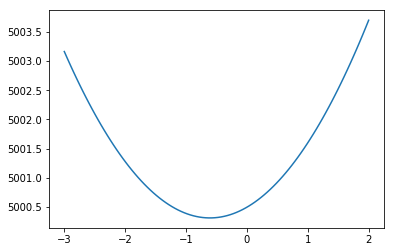

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(theta1s, costs)
plt.show()

## Cost function, continued

The cost function above is quadratic, like a parabola, with respect to the slope and we can see there is a **global minimum**. A global minimum is the point where the function has **the lowest** value. We need to find the best set of parameters to minimize the cost function, but here we are only varying the slope and keeping the intercept constant. <br>

**The minimum of the cost function** is **the point where the model has the lowest error**, hence the point where our parameters are optimized. Instead we can use a 3D plot to visualize this cost function where the x and y axis will be the slope and intercept and the z axis will be the cost.


[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]] 
 [[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]


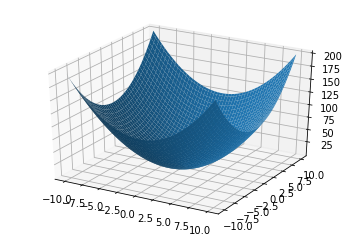

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Example of a Surface Plot using Matplotlib
# Create x an y variables
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y
X, Y = np.meshgrid(x,y)
print(X[:5,:5],"\n",Y[:5,:5])

# Compute a 3D parabola 
Z = X**2 + Y**2 

# Open a figure to place the plot on
fig = plt.figure()
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

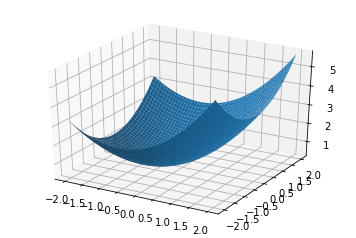

In [30]:
theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
COST = np.empty(shape=(100,100))

# Meshgrid for paramaters 
T0S, T1S = np.meshgrid(theta0s, theta1s)
# for each parameter combination compute the cost
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)

# make 3d plot
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)
plt.show()

## Cost function, slopes

Gradient descent relies on finding the direction of the largest gradient where a gradient is the "slope" of a multivariable function. To find this gradient we can take the partial derivative in terms of each parameter in the cost function. A partial derivative represents the slope of a multivariable function in terms of a single parameter, ie. holding all other variables constant, what is the slope in the direction of the one parameter. In the case of this cost function, we will take the partial derivatives in terms of $theta_0$ and $theta_1$. <br>

Visually, looking at the 3D plot above, we want to find the slope of the function in the direction either the x or y axis. If you are not familiar with derivatives do not worry, we will not require you to derive any in this lesson. Most importantly we must remember that we are just finding the incline of a function relative to each parameter.

$\dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}$  is read as the partial derivative of J(θ0,θ1) in terms of θ0. This is not part of the equation but just the representation of partial derivatives.<br>

The partial derivative of the cost function in terms of $theta_0$ is:

$$\dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} = \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i)-y_i)$$

The partial deriviate of the cost function in terms of $theta_1$ is: 

$$\dfrac{\partial J(\theta_1)}{\partial \theta_1} = \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i)-y_i) * x_i$$

We've written the code to compute the partial derivative in terms of theta1 below. `theta0` and `theta1` are inputs to the function to give a reference point of where to take the derivative from. `x` is our feature vector and `y` are the observed, target, values. We then find the error between our observations and hypothesised model and multiply by `x`. The average of all these terms is then the partial derivative. This function gives us the slope in the direction of the $\theta_{1}$ coefficient.



Write a function named `partial_cost_theta0(theta0, theta1, x, y)` to compute $\dfrac{\partial \text{J}(\theta_0, \theta_1)}{\partial \theta_0}$.
* `theta0` and `theta1` are initial parameters of the linear model, `x` is our feature vector (distance) and `y` are the observations (accuracy).
* Assign the partial derivative where `theta0`=1, `theta1`=1, `x=pga.distance`, and `y=pga.accuracy` to variable `partial0`.

In [33]:
def partial_cost_theta1(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = (h - y) * x
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial1 = partial_cost_theta1(0, 5, pga.distance, pga.accuracy)
print("partial1 =", partial1)

partial1 = 5.57913385407


In [38]:
def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Difference between hypothesis and observation
    diff = (h - y)
    # Compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)
print("partial0 =", partial0)

partial0 = 1.0


## Gradient descent algorithm

Visually, we see that by varying our slope and intercept we get drastically different costs. In order to minimize the error between our hypothesised model and observations we can find the minimum of the cost function by changing the parameters. Gradient descent is a widely used method to find the optimal parameters. To execute gradient descent we randomly initialize a set of parameters and update them by moving in the direction of the cost function's steepest slope, ie. the descending down the function. If we can find the downward slope in terms of each parameter we can move in the direction of the global minumum. Eventually the updates will converge to a near optimal set of parameters. When parameters converge the hypothesised parameters become very close to the optimal parameters. We measure convergence by finding the difference between the previous iterations cost versus the current cost.<br>

The general gradient descent algorithm for two variables is:

*repeat until convergence {*
$$\theta_1 := \theta_1 - \alpha * \dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_1}$$
$$\theta_0 := \theta_0 - \alpha * \dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}$$
*}*

Let's go through this term by term. $\theta_1$ is the current value of our coefficient, ie. how much accuracy is lost per yard of distance. $\alpha$ is the learning rate. This value is set by the user and controls how fast the algorithm will converge by changing the parameters by some percentage of the slope. Values of this learning rate can vary from project to project but in general learning rates can be between `0.0001` and `1.` This value must not be too large or the algorithm will overshoot the minimum but if it's too small it will take many iterations to converge.<br>

$\dfrac{\partial J(\theta_0)}{\partial \theta_1}$ is the partial derivative of our cost function in terms of $\theta_0$ and $\dfrac{\partial J(\theta_1)}{\partial \theta_1}$ is the partial derivative of our cost function in terms of $\theta_1$. These measure the partial derivatives in relation to our coefficients. Since we want to minimize the cost function we substract the partial derivatives times some learning rate from our coefficients to get our new set of coefficients.<br>

We will start by initializing a few variables. `updates` will store our convergence data for visualization later. `theta0` and `theta1` will hold initial values of the slope and intercept. `alpha` is used for our learning rate. Finding a learning rate is often done by trial and error. A good starting point is 0.01. If you find that the algorithm is learning too slowly it can be increased. If the cost starts increasing out of control then the learning rate is probably overshooting the minimum and should be decreased. We will then use the max_epochs to limit the number of iterations so it doesn't run forever. `c` will be used to hold the initial cost using the initial parameters.

* Execute the gradient descent algorithm with `alpha=0.01`, `x=pga.distance`, and `y=pga.accuracy`.
* Make a plot of `costs` on the y-axis and the iteration (0 to `len(costs)`) on the x-axis.

In [39]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the intial theta0 
# theta1 is the intial theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations
    counter = 0      # Intialize a counter
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10  # 10 has no meaning; +10 is just to make different value from c.
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #         so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])

Theta1 = -0.604698316638


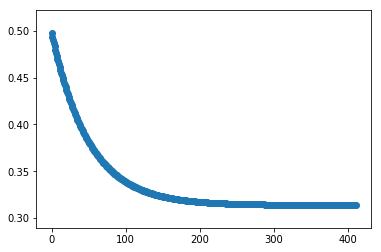

In [45]:
grad_desc_alpha001 = gradient_descent(pga.distance, pga.accuracy, alpha=0.01)

plt.scatter(range(len(grad_desc_alpha001['costs'])), grad_desc_alpha001['costs'])
plt.show()

In [51]:
print(grad_desc_alpha001['theta0'], 
      '/', 
      grad_desc_alpha001['theta1'])
grad_desc_alpha001['costs'][-1]

-2.68554496182e-15 / -0.597625638246


0.31386023976790428

## Conclusion

Gradient descent is a widely used algorithm for computing local and global minimum in functions. Here we showed that gradient descent produced nearly identical results as least squares. As your data becomes larger and more complex gradient descent can aid in parameter optimization. Looking forward, we will use a modified gradient descent to teach neural networks.